# Apartments Analysis

In this project, we will analyze Apartments for rent in the city of Tel Aviv.        
Our main goals are to try to understand in depth the area of apartment rental in Tel Aviv.   

## Introduction and Background
Finding an apartment for rent is not a simple task. And it is usually necessary to see a large number of apartments 
and be prepared for certain compromises before we can make a decision and enter any apartment.  
For that, we performed in-depth analysis to understand the field in depth.   
Our motivation in choosing a project topic in this area comes from the fact that we find ourselves  
spending a lot of time, each day, for finding apartments for rent. 

## Data acquisition
For the purposes of this project, we will use data collected from ads which have been published on the site Yad2.   
All the information has been collected using a Web crawler.    


### Work through the notebook
First we will import all the relevant dependencies we need.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

#### Loading in the data  
Our data is stored and organized in a csv file.  
We'll start reading in the data into pandas dataframe and see some information.  

In [2]:
# Read in the data
apartments = pd.read_csv('apartments.csv')

print(f'Apartments dataset has {apartments.shape[0]} entries with {apartments.shape[1]} variables.')

Apartments dataset has 657 entries with 13 variables.


In [3]:
apartments.sample(10)

Address    Area     Price    Rooms Floor Square-meter  \
281        בן אביגדור   center   4,500 ₪        3     2           55   
330  דרך מנחם בגין 144  center     300 ₪  לא צוין    -1           10   
545          הרטגלס 11   north   6,000 ₪      2.5     1           70   
378              פינס   center     800 ₪  לא צוין  קרקע           18   
629           רדינג 27   north   9,000 ₪      4.5  קרקע           82   
539           ענתות 35   north   7,700 ₪        4     2          100   
37           הקונגרס 5   south   7,200 ₪        4  קרקע           92   
364       מחנה יוסף 25  center   9,000 ₪        3  קרקע           80   
7             הרטוב 18   south   6,000 ₪        4     1           90   
398            אילת 61  center  11,000 ₪        3    28           87   

                                     Area-text  Elevator  Air-condition  \
281            מונטיפיורי, הרכבת, תל אביב יפו       True           True   
330            מונטיפיורי, הרכבת, תל אביב יפו      False          False   
545                     רמת אביב, תל אביב יפו      False           True   
378                     נווה צדק, תל אביב יפו      False          False   
629                     רמת אביב, תל אביב יפו      False           True   
539          גני צהלה, רמות צהלה, תל אביב יפו       True           True   
37                     נווה שאנן, תל אביב יפו      False           True   
364                     נווה צדק, תל אביב יפו      False           True   
7     התקוה, בית יעקב, נווה צה"ל, תל אביב יפו       True           True   
398                     נווה צדק, תל אביב יפו       True           True   

     Refurbished  Furniture        lon        lat  
281         True       True  34.788884  32.067265  
330        False      False        NaN        NaN  
545         True       True  34.796732  32.104559  
378        False      False  34.766480  32.062785  
629         True      False  34.793975  32.106848  
539         True      False  34.830630  32.125348  
37          True      False  34.773564  32.057333  
364         True       True  34.766583  32.064257  
7           True      False  34.798261  32.048701  
398         True       True  34.766741  32.059744

### Feature Observation

In [4]:
# Data features
apartments[0:0]

Empty DataFrame
Columns: [Address, Area, Price, Rooms, Floor, Square-meter, Area-text, Elevator, Air-condition, Refurbished, Furniture, lon, lat]
Index: []

- **Address**: the actual apartment address
- **Area**: we divided the city into areas north-south-center
- **Area-text**: the neighborhood where the apartment is located
- **Price**: price of rent per month in ILS
- **Rooms**: number of rooms in the apartment
- **Floor**: number of floor of the apartment in the building
- **Square-meter**: the size of the apartment space in square meters
- **Elevator/Air-condition/Refurbished/Furniture**: additional parameters that can be exist or not
- **lon, lat**: Longitude and Latitude coordinates

## Data cleaning

In [5]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        657 non-null    object 
 1   Area           657 non-null    object 
 2   Price          657 non-null    object 
 3   Rooms          657 non-null    object 
 4   Floor          657 non-null    object 
 5   Square-meter   657 non-null    object 
 6   Area-text      657 non-null    object 
 7   Elevator       657 non-null    bool   
 8   Air-condition  657 non-null    bool   
 9   Refurbished    657 non-null    bool   
 10  Furniture      657 non-null    bool   
 11  lon            569 non-null    float64
 12  lat            569 non-null    float64
dtypes: bool(4), float64(2), object(7)
memory usage: 48.9+ KB


### Handling missing data and duplicates
Some of the values are missing, they anotated as 'לא צוין'  
We will also delete the duplicated data

In [6]:
# Remove missing values
apartments = apartments[apartments['Price'].str.strip() != 'לא צוין מחיר']
apartments = apartments[apartments['Rooms'].str.strip() != 'לא צוין']
apartments = apartments[apartments['Square-meter'].str.strip() != 'לא צוין']

# Drop duplicated data
apartments.drop_duplicates(inplace=True)

### Handling Data types
Lets look at the variables type

In [7]:
apartments.dtypes

Address           object
Area              object
Price             object
Rooms             object
Floor             object
Square-meter      object
Area-text         object
Elevator            bool
Air-condition       bool
Refurbished         bool
Furniture           bool
lon              float64
lat              float64
dtype: object

We can see that some of the variables are not in the correct type, such as **Price**, **Rooms**, **Floor** so we will need to convert them.

In [8]:
# Fix values
apartments['Price'] = apartments['Price'].apply(lambda s: s.replace(',', '').replace('$', '').replace('₪', '')).astype('float')
apartments.loc[apartments['Floor'] == 'קרקע', 'Floor'] = 0

# Convert data types into a valid type
apartments['Price'] = apartments['Price'].astype('float')
apartments['Rooms'] = apartments['Rooms'].astype('float')
apartments['Floor'] = apartments['Floor'].astype('int')
apartments['Square-meter'] = apartments['Square-meter'].astype('int')

apartments.dtypes

Address           object
Area              object
Price            float64
Rooms            float64
Floor              int32
Square-meter       int32
Area-text         object
Elevator            bool
Air-condition       bool
Refurbished         bool
Furniture           bool
lon              float64
lat              float64
dtype: object

### Outliers

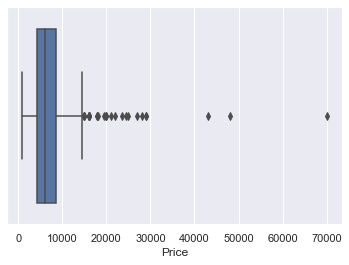

In [9]:
sns.boxplot(apartments['Price'])

Looks like we have some outliers

In [10]:
# Remove outliers
apartments = apartments[apartments['Price'] < 25000]

Some of the data contains parking and storage for rent, we will filter them by price and square-meter

Now the dataset has 595 entries.


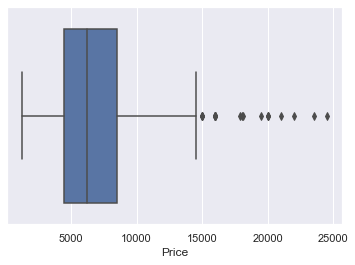

In [11]:
# Filtering parkings/storages
apartments = apartments[apartments['Price'] > 1000]
apartments = apartments[apartments['Square-meter'] > 15]

print(f'Now the dataset has {apartments.shape[0]} entries.')

sns.boxplot(apartments['Price'])

## Let's explore some of the features

#### Elevator, Air-condition, Refurbished, Furniture
How many apartments do they have and some do not?

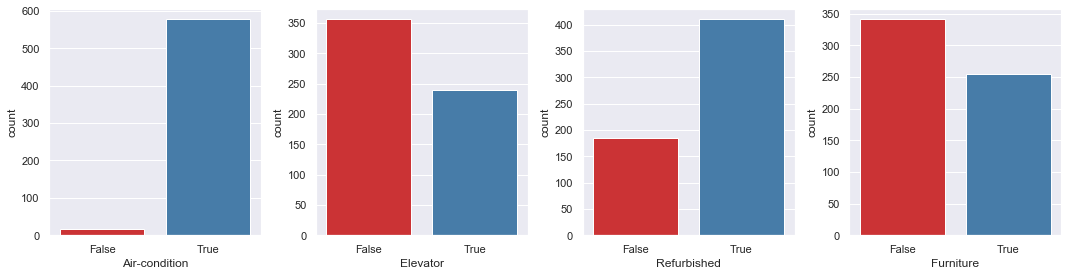

In [12]:
# Plot on the same figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15, 4))

sns.countplot(x='Air-condition', data=apartments, ax=ax1, palette='Set1')
sns.countplot(x='Elevator', data=apartments, ax=ax2, palette='Set1')
sns.countplot(x='Refurbished', data=apartments, ax=ax3, palette='Set1')
sns.countplot(x='Furniture', data=apartments, ax=ax4, palette='Set1')

# Fix layout spaces
plt.tight_layout()

Almost all of the apartments have air condition, still .. this is Tel Aviv

### Rooms
The distribution of number of rooms in the apartments

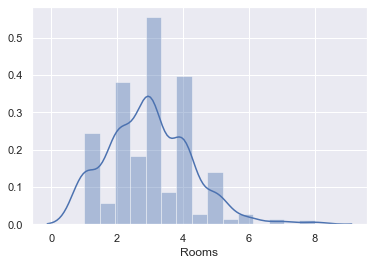

In [13]:
sns.distplot(apartments['Rooms'])

We can see that the average number of rooms is 3

### Price
The prices are in ILS (israeli shekels)

count      595.0
mean      7017.0
std       3529.0
min       1300.0
25%       4500.0
50%       6200.0
75%       8500.0
max      24500.0
Name: Price, dtype: float64

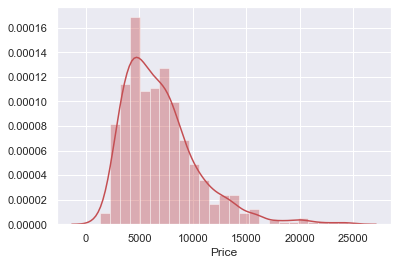

In [14]:
sns.distplot(apartments['Price'], color='r')

# Price stats
apartments['Price'].describe().round()

### The relationship between the variables

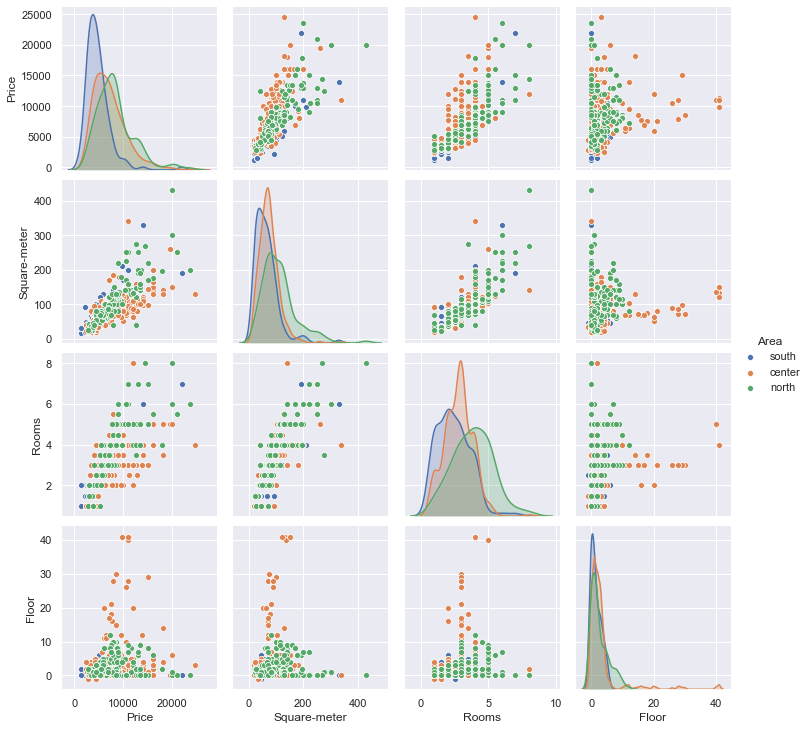

In [15]:
sns.pairplot(apartments[['Price', 'Square-meter', 'Rooms', 'Floor', 'Area']], hue='Area')

### The relationship between number of rooms and square-meter

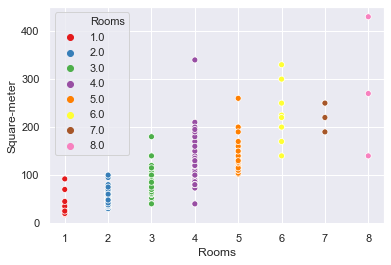

In [16]:
rounded_rooms = apartments[apartments.Rooms.apply(lambda x: x % 1 == 0)]
sns.scatterplot(x='Rooms', y='Square-meter', hue='Rooms', data=rounded_rooms, palette="Set1")
plt.legend(loc='upper left')

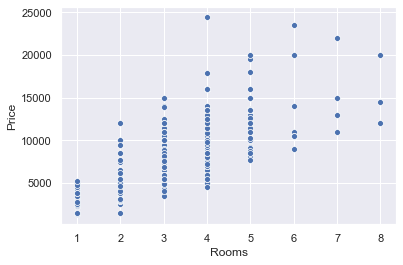

In [17]:
sns.scatterplot(x='Rooms', y='Price', data=rounded_rooms, palette="Set1")


the more rooms the apartment has, the higher the Square meters should be

### The relationship between **Price**  and **Square-meter**

[None, None]

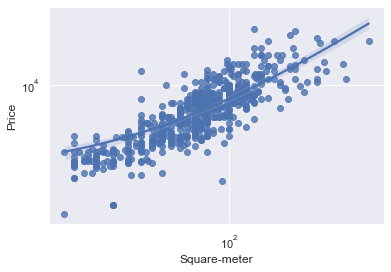

In [18]:
# plot = sns.jointplot(x='Square-meter', y='Price', data=apartments, color='purple')
# plot.ax_joint.set_xscale('log')
# plot.ax_joint.set_yscale('log')
plot = sns.regplot(apartments['Square-meter'], apartments['Price'])
plot.set(xscale='log', yscale='log')

## Exploring Interesting Data
Let's see some intresting insights about the data

### what is the avereage price per area?

Area
center    7275.0
north     8402.0
south     4849.0
Name: Price, dtype: float64

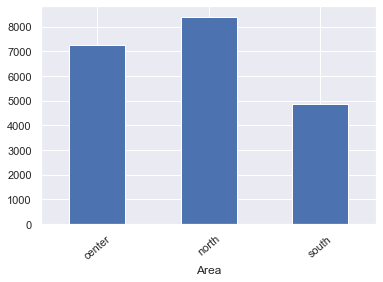

In [19]:
avg_per_area = apartments.groupby('Area')['Price'].mean()
avg_per_area.plot.bar(rot=40)
avg_per_area.round()

We can see that the **center** and the **north** are the most expensive areas.   
it is legitimate because they are the hottest areas in the city, and Tel Aviv is a young city and most of the entertainment places are in these areas

### What is the price for each square meter in each area?

In [20]:
apartments['newArea'] = apartments['Area']
apartments.loc[apartments['Area'].str.contains('center'), 'newArea'] = 'center'
apartments['price_to_meter'] = apartments['Price'] / apartments['Square-meter']
grouped = apartments.groupby('newArea')['price_to_meter'].mean()
grouped

newArea
center    102.834396
north      82.447702
south      85.111018
Name: price_to_meter, dtype: float64

### Geographical View
#### how these prices look geographically? 

In [21]:
import folium

In [22]:
# Initialialize map
m = folium.Map(location=[32.073333, 34.7999900], zoom_start=14)

avg_per_meter = apartments.groupby('Area-text')['price_to_meter'].mean().to_dict()

# Set colors per apartment
apartments['color'] = apartments.apply(lambda apt: '#FF1700' if (avg_per_meter[apt['Area-text']] < apt['price_to_meter']) else '#2CD31D', axis=1)

for index, row in apartments.iterrows():
    if not np.isnan(row.lat):
        marker = folium.CircleMarker(
            location=[row.lat, row.lon],
            radius=row['Square-meter'] % 10,
            color=row['color'],
            fill=True,
            fill_color=row['color'],
            fill_opacity='0.3',
            popup=row.Address)
        m.add_child(marker)
m

**Circle size**: according to the apartment size   
**Red**: high price to meter ratio in neighberhood  
**Green**: low price to meter ratio in neighberhood

## Machine Learning
### We will try to predict the apartment price

In [23]:
# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import logistic
from scipy.special import expit
from scipy.special import logit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Visualize desicion tree
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import pydotplus

### Prepare the dataset
The model will only take numeric values, and right now we have a few columns that are categorical 

In [24]:
features = ['Price', 'Rooms', 'Square-meter', 'Floor', 'Area', 'Area-text', 'Elevator','Refurbished','Furniture']
train_dataset = apartments[features]

# Transform categorical variables using dummy variables
train_dataset = train_dataset.join(pd.get_dummies(train_dataset['Area']))
train_dataset = train_dataset.join(pd.get_dummies(train_dataset['Area-text']))
train_dataset = train_dataset.drop(['Area', 'Area-text'], axis=1)

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(train_dataset.drop('Price', axis=1), train_dataset[['Price']], test_size=0.2)

## Choosing a regression algorithm
which has the best prediction accuracy given our data?

C:\Users\sara levi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


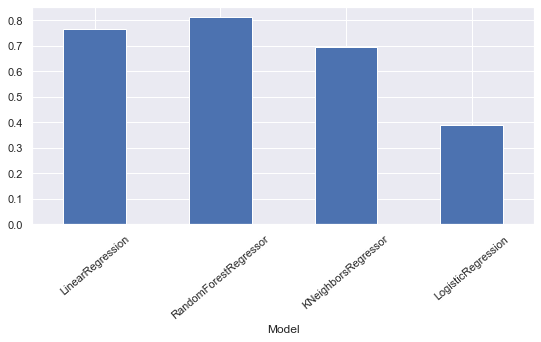

In [25]:
# Regression models
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=400, max_features='sqrt', criterion='mse', min_samples_split= 2),
          KNeighborsRegressor(n_neighbors=6),
          LogisticRegression(solver='liblinear')]
        

test_models = pd.DataFrame()
tmp = {}
for model in models:
    model_name = str(model)
    tmp['Model'] = model_name[:model_name.index('(')]
    model.fit(xtrain, ytrain['Price'])
    tmp['R2_Price'] = r2_score(ytest['Price'], model.predict(xtest))
    test_models = test_models.append([tmp])

test_models.set_index('Model', inplace=True)
fig, axes = plt.subplots(ncols=1, figsize=(9, 4))
test_models.R2_Price.plot(ax=axes, kind='bar', rot=40)
plt.show()

As we can see, the Random Forest regressor showed the best accuracy, so we decided to use this algorithm

### Prediction 
Predict the prices using Random Forest

In [26]:
model = RandomForestRegressor(n_estimators=400,
                              max_features='sqrt',
                              criterion = 'mse',
                              min_samples_split= 2)
# Train
model.fit(xtrain, ytrain.values.ravel())

# Predict
y_pred_train = model.predict(xtrain)
print('training data accuracy:', model.score(xtrain, ytrain))

y_pred = model.predict(xtest)
print('test data accuracy:', model.score(xtest, ytest))

training data accuracy: 0.9660748956935953
test data accuracy: 0.8089462244870665


### Predicted Values(blue) vs Actual Values(red)

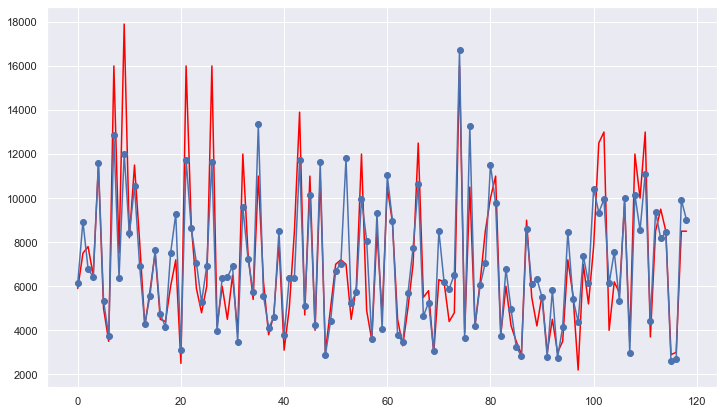

In [27]:
plt.figure(figsize=(12, 7))
plt.plot(range(0, ytest.shape[0]), ytest, color='red')
plt.plot(range(0, y_pred.shape[0]), y_pred, marker='o')

In [28]:
results = pd.concat([xtest, ytest], axis=1)
results['predicted_price'] = y_pred
print(results[['Price', 'predicted_price']].head())

       Price  predicted_price
584   5900.0      6160.125000
201   7500.0      8937.404167
319   7800.0      6796.208333
42    6500.0      6412.750000
514  11500.0     11613.750000


### Visualize a Decision Tree

In [29]:
# # Extract single tree
# estimator = model.estimators_[1]

# filename = 'tree.dot'
# with open(filename, 'w') as f:
#     f = export_graphviz(estimator, out_file=f, feature_names=train_dataset.columns[1:], class_names=['Price'],
#                         filled=True, rounded=True)
    
# dot_data = ""
# with open(filename, 'r') as f:
#     dot_data = f.read()
    
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('tree.png')
Image(filename = 'tree.png')

## Clasification
####  We will try to predict the apartment area
#### Area is a categorical variable so this is a classification problem

### the distribution between Price and Square-meter according the apartment area

[None, None]

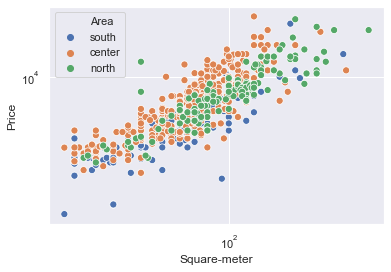

In [30]:
plot = sns.scatterplot(apartments['Square-meter'], apartments['Price'], hue=apartments['Area'] ,s=50)
plot.set(xscale='log', yscale='log')

### We will use the KNN Classifier

### Prepare the data

In [31]:
features = ['Price', 'Rooms', 'Square-meter', 'Floor', 'Area', 'Elevator','Refurbished','Furniture']
train_dataset = apartments[features]

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(train_dataset.drop('Area', axis=1), train_dataset[['Area']], test_size=0.2)

### Choosing the right K
which one could give us the best accuracy?

### The relationship between K and the testing accuracy

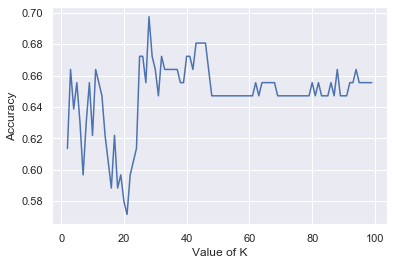

In [32]:
k_range = range(2, 100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain.values.ravel())
    pred = knn.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest, pred)
    scores_list.append(metrics.accuracy_score(ytest, pred))

plt.plot(k_range, scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
max_score = max(scores, key=scores.get)

### Predict the area

In [33]:
clf = neighbors.KNeighborsClassifier(max_score)
clf.fit(xtrain, ytrain.values.ravel())

results = pd.concat([xtest, ytest], axis=1)
results['predicted_area'] = clf.predict(xtest)

print(f'accuracy={clf.score(xtest, ytest)}')
results[['Area', 'predicted_area']]

accuracy=0.6974789915966386


Area predicted_area
69    south          south
193  center         center
231  center         center
344  center         center
62    south          south
..      ...            ...
254  center         center
483  center         center
281  center         center
171  center         center
242  center         center

[119 rows x 2 columns]

## Conclusion

This project helped us a lot in understanding the apartment rental market in Tel Aviv. 
We are pleased with the accuracy of the predictions we were able to achieve 
Of course, the accuracy of the models can be improved by adding more information and additional features.
In the future, we will expand the scope of this project and add more cities.
